### Research And Debugging

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import os
import yaml
import pickle

In [2]:
# Loading the parameters from the yaml file
params = yaml.safe_load(open("params.yaml"))['preprocess']

# Loading the raw data
df = pd.read_csv(params['input'])

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Dropping NA values
df = df.dropna()

# Dropping duplicates
df = df.drop_duplicates()

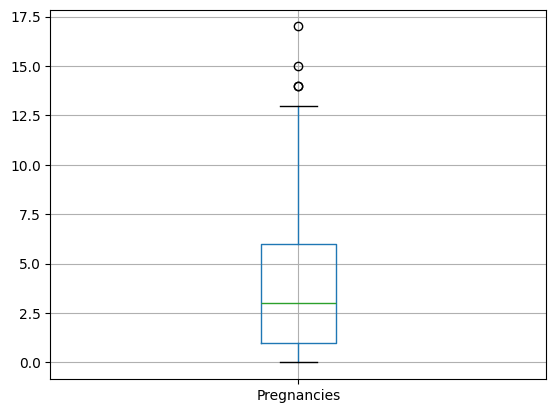

In [4]:
# Creating a boxplot to plot outliers in Pregnancies
df.boxplot("Pregnancies")
plt.show()

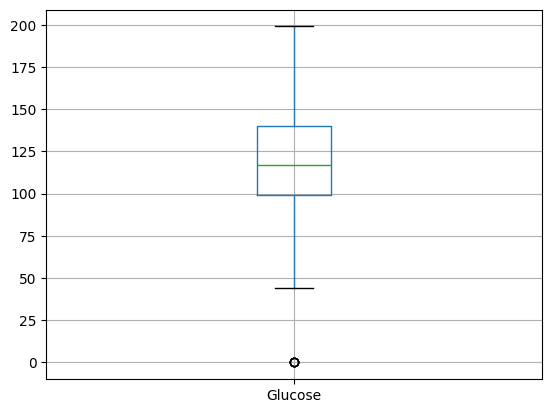

In [5]:
# Creating a boxplot to plot outliers in Glucose
df.boxplot("Glucose")
plt.show()

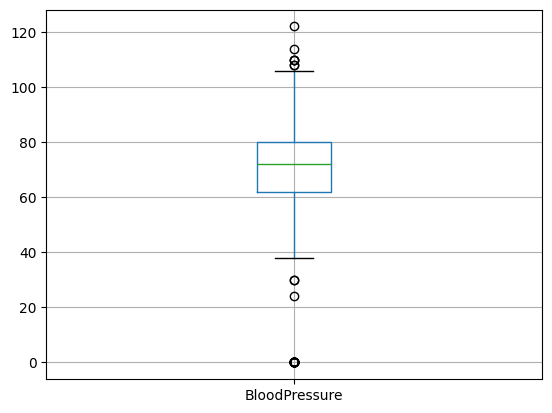

In [6]:
# Creating a boxplot to plot outliers in BloodPressure
df.boxplot("BloodPressure")
plt.show()

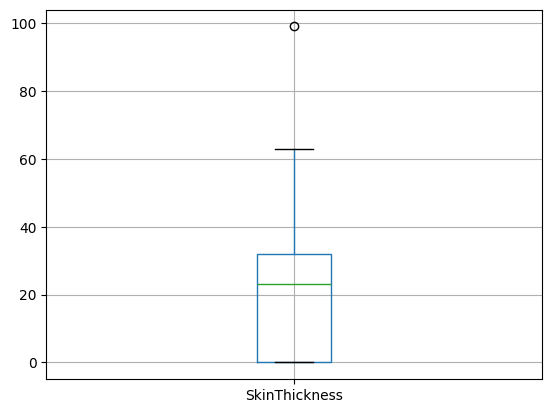

In [7]:
# Creating a boxplot to plot outliers in SkinThickness
df.boxplot("SkinThickness")
plt.show()

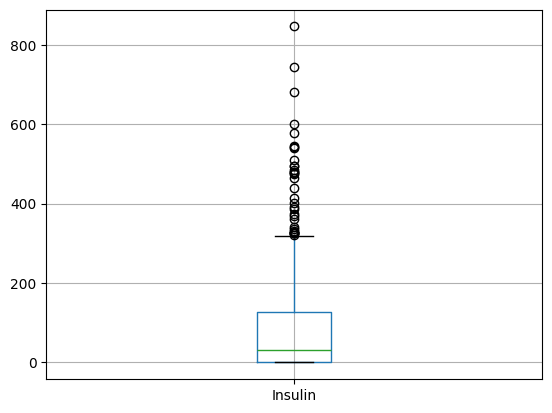

In [8]:
# Creating a boxplot to plot outliers in Insulin
df.boxplot("Insulin")
plt.show()

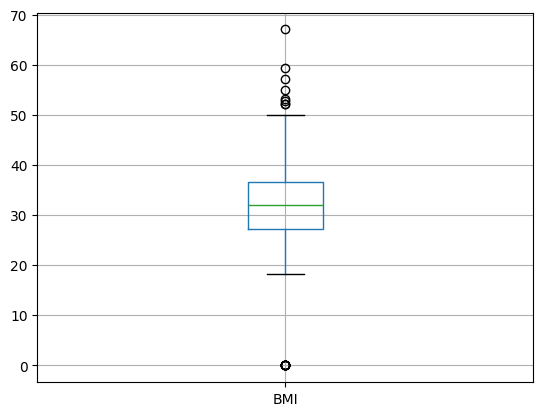

In [9]:
# Creating a boxplot to plot outliers in BMI
df.boxplot("BMI")
plt.show()

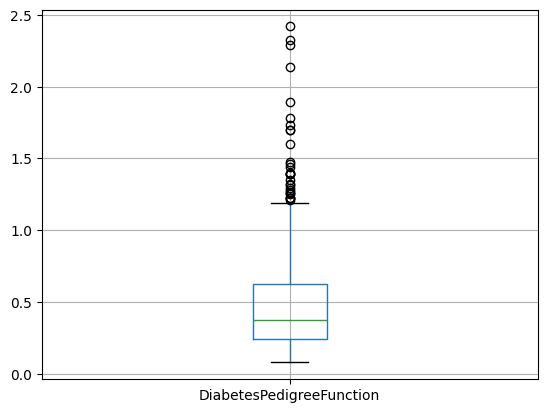

In [10]:
# Creating a boxplot to plot outliers in DiabetesPedigreeFunction
df.boxplot("DiabetesPedigreeFunction")
plt.show()

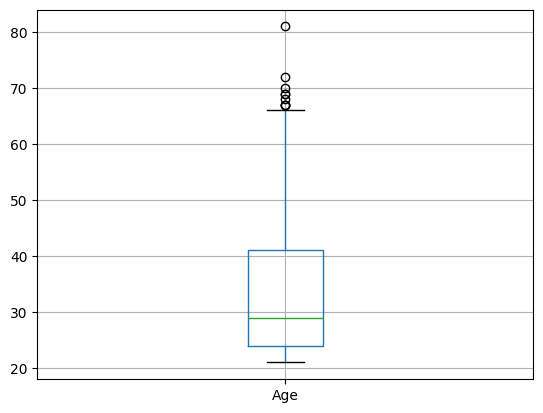

In [11]:
# Creating a boxplot to plot outliers in Age
df.boxplot("Age")
plt.show()

In [12]:
# Creating a scaling object
scaler = MinMaxScaler(feature_range=(0,1))

# Splitting the dataframe into data and target values
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling the data
scaled_X = scaler.fit_transform(X)

# Craeting a scaled dataframe
scaled_df = pd.DataFrame(scaled_X, columns=X.columns)
scaled_df["Outcome"] = y

scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [13]:
# Creating a directory to save the preprocessed data
os.makedirs("data/preprocessed", exist_ok=True)

# Creating a directory to store the scaling transformer
os.makedirs("transformers", exist_ok=True)

# Saving the scaling transformer in the desired directory
pickle.dump(scaler, open(params['transformers'], 'wb'))

# Saving the preprocessed data in the desired directory
scaled_df.to_csv(params['output'], index=False)

### Actual Implementation

In [14]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import os
import yaml
import pickle

# Loading the parameters from the yaml file
params = yaml.safe_load(open("params.yaml"))['preprocess']

# Creating a function to preprocess data
def preprocess(input_path, output_path):

    # Loading the raw data
    df = pd.read_csv(params['input'])

    # Dropping NA values
    df = df.dropna()

    # Dropping duplicates
    df = df.drop_duplicates()

    # Creating a scaling object
    scaler = MinMaxScaler(feature_range=(0,1))

    # Splitting the dataframe into data and target values
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Scaling the data
    scaled_X = scaler.fit_transform(X)

    # Craeting a scaled dataframe
    scaled_df = pd.DataFrame(scaled_X, columns=X.columns)
    scaled_df["Outcome"] = y

    # Creating a directory to save the preprocessed data
    os.makedirs("../data/preprocessed", exist_ok=True)

    # Creating a directory to store the scaling transformer
    os.makedirs("transformers", exist_ok=True)

    # Saving the scaling transformer in the desired directory
    pickle.dump(scaler, open(params['transformers'], 'wb'))

    # Saving the preprocessed data in the desired directory
    scaled_df.to_csv(output_path, index=False)

    # Displaying the success statement
    print("The data was successfully preprocessed!")

# Calling the preprocess function with the input path
preprocess(params['input'], params['output'])

The data was successfully preprocessed!
